In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.datasets import fetch_california_housing
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD
import torch.utils.data as Data
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# 导入数据
housedata = fetch_california_housing()
# 切分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(housedata.data, housedata.target,test_size = 0.3, random_state = 42)

In [5]:
X_train, X_test, y_train, y_test

(array([[   4.1312    ,   35.        ,    5.88235294, ...,    2.98529412,
           33.93      , -118.02      ],
        [   2.8631    ,   20.        ,    4.40120968, ...,    2.0141129 ,
           32.79      , -117.09      ],
        [   4.2026    ,   24.        ,    5.61754386, ...,    2.56491228,
           34.59      , -120.14      ],
        ...,
        [   2.9344    ,   36.        ,    3.98671727, ...,    3.33206831,
           34.03      , -118.38      ],
        [   5.7192    ,   15.        ,    6.39534884, ...,    3.17889088,
           37.58      , -121.96      ],
        [   2.5755    ,   52.        ,    3.40257649, ...,    2.10869565,
           37.77      , -122.42      ]]),
 array([[   1.6812    ,   25.        ,    4.19220056, ...,    3.87743733,
           36.06      , -119.01      ],
        [   2.5313    ,   30.        ,    5.03938356, ...,    2.67979452,
           35.14      , -119.46      ],
        [   3.4801    ,   52.        ,    3.97715472, ...,    1.36033229,

In [6]:
# 数据标准化处理
scale = StandardScaler()
X_train_s = scale.fit_transform(X_train)
X_test_s = scale.transform(X_test)

In [7]:
# 将训练数据转为数据表
housedatadf = pd.DataFrame(data=X_train_s, columns = housedata.feature_names)
housedatadf['target'] = y_train
housedatadf

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,0.133506,0.509357,0.181060,-0.273850,-0.184117,-0.010825,-0.805682,0.780934,1.93800
1,-0.532218,-0.679873,-0.422630,-0.047868,-0.376191,-0.089316,-1.339473,1.245270,1.69700
2,0.170990,-0.362745,0.073128,-0.242600,-0.611240,-0.044800,-0.496645,-0.277552,2.59800
3,-0.402916,-1.155565,0.175848,-0.008560,-0.987495,-0.075230,1.690024,-0.706938,1.36100
4,-0.299285,1.857152,-0.259598,-0.070993,0.086015,-0.066357,0.992350,-1.430902,5.00001
...,...,...,...,...,...,...,...,...,...
14443,1.308827,0.509357,0.281603,-0.383849,-0.675265,-0.007030,-0.875918,0.810891,2.29200
14444,-0.434100,0.350793,0.583037,0.383154,0.285105,0.063443,-0.763541,1.075513,0.97800
14445,-0.494787,0.588640,-0.591570,-0.040978,0.287736,0.017201,-0.758858,0.601191,2.22100
14446,0.967171,-1.076283,0.390149,-0.067164,0.306154,0.004821,0.903385,-1.186252,2.83500


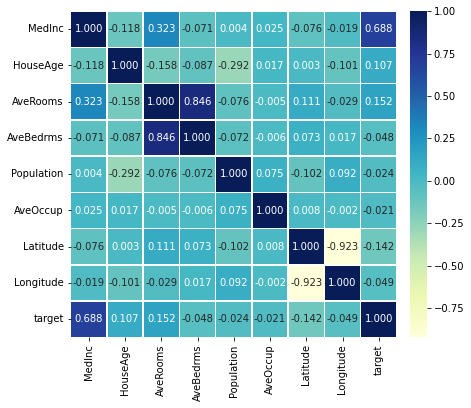

In [8]:
datacor = np.corrcoef(housedatadf.values, rowvar=0)
datacor = pd.DataFrame(data = datacor, columns = housedatadf.columns,index = housedatadf.columns)
plt.figure(figsize=(8, 6))
ax = sns.heatmap(datacor, square = True, annot = True, fmt = '.3f',linewidths = .5, cmap = 'YlGnBu',cbar_kws = {'fraction': 0.046, 'pad': 0.03})
plt.show()

In [9]:
# 将数据集转为张量
X_train_t = torch.from_numpy(X_train_s.astype(np.float32))
y_train_t = torch.from_numpy(y_train.astype(np.float32))
X_test_t = torch.from_numpy(X_test_s.astype(np.float32))
y_test_t = torch.from_numpy(y_test.astype(np.float32))

In [10]:
# 将训练数据处理为数据加载器
train_data = Data.TensorDataset(X_train_t, y_train_t)
test_data = Data.TensorDataset(X_test_t, y_test_t)
train_loader = Data.DataLoader(dataset = train_data, batch_size = 64, shuffle = True, num_workers = 1)

In [14]:
# 搭建全连接神经网络回归
class MLPregression(nn.Module):
    def __init__(self):
        super(MLPregression, self).__init__()
        # 第一个隐含层
        self.hidden1 = nn.Linear(in_features=8, out_features=100, bias=True)
        # 第二个隐含层
        self.hidden2 = nn.Linear(100, 100)
        # 第三个隐含层
        self.hidden3 = nn.Linear(100, 50)
        # 回归预测层
        self.predict = nn.Linear(50, 1)
        # 定义网络前向传播路径
    def forward(self, x):
        x = F.relu(self.hidden1(x))
        x = F.relu(self.hidden2(x))
        x = F.relu(self.hidden3(x))
        output = self.predict(x)# 输出一个一维向量return output[:, 0]

In [15]:
# 输出网络结构
from torchsummary import summary
testnet = MLPregression()
summary(testnet, input_size=(1, 8)) # 表示1个样本，每个样本有8个特征

ModuleNotFoundError: No module named 'torchsummary'